In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_dir = "/kaggle/input/brain-tumor-mri-dataset/Training"
test_dir = "/kaggle/input/brain-tumor-mri-dataset/Testing"

In [ ]:
import os
print(os.listdir("/kaggle/input/brain-tumor-mri-dataset/Training"))
print(os.listdir("/kaggle/input/brain-tumor-mri-dataset/Testing"))

['pituitary', 'notumor', 'meningioma', 'glioma']
['pituitary', 'notumor', 'meningioma', 'glioma']


# **Data Preprocessing**

In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
from tensorflow.keras.utils import to_categorical

data_dir = "/kaggle/input/brain-tumor-mri-dataset/Training"
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
IMG_SIZE = 128

data = []

for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)
    
    for img_name in tqdm(os.listdir(path), desc=f"Processing {category}"):
        try:
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append([img, label])
        except:
            pass

random.shuffle(data)

X = []
y = []

for img, label in data:
    X.append(img)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = to_categorical(np.array(y), num_classes=4)  # one-hot encoding

print("X shape:", X.shape)
print("y shape:", y.shape)

2025-08-06 18:41:48.243761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754505708.469831      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754505708.535504      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Processing pituitary: 100%|██████████| 1457/1457 [00:10<00:00, 139.32it/s]


X shape: (5712, 128, 128, 1)
y shape: (5712, 4)


# **Model 1: Baseline CNN**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# building the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-06 18:43:31.343603: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 70s 466ms/step - accuracy: 0.5669 - loss: 0.9693 - val_accuracy: 0.8206 - val_loss: 0.4794
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 461ms/step - accuracy: 0.8288 - loss: 0.4311 - val_accuracy: 0.8469 - val_loss: 0.4074
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 461ms/step - accuracy: 0.8784 - loss: 0.3228 - val_accuracy: 0.8749 - val_loss: 0.3363
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 64s 450ms/step - accuracy: 0.9212 - loss: 0.2207 - val_accuracy: 0.8968 - val_loss: 0.2741
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 463ms/step - accuracy: 0.9510 - loss: 0.1458 - val_accuracy: 0.8863 - val_loss: 0.2983
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 458ms/step - accuracy: 0.9545 - loss: 0.1374 - val_accuracy: 0.9178 - val_loss: 0.2461
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 466ms/step - accuracy: 0.9650 - loss: 0.0966 - val_accuracy: 0.9256 - val_loss: 0.2343
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 64s 448ms/step - accuracy: 0.9650 - loss: 0

# **Model Evaluation**

In [20]:
loss, acc = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {acc:.4f}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9298 - loss: 0.2070
Validation Accuracy: 0.9283


# **Model 1: Accuracy and Loss Visualization**

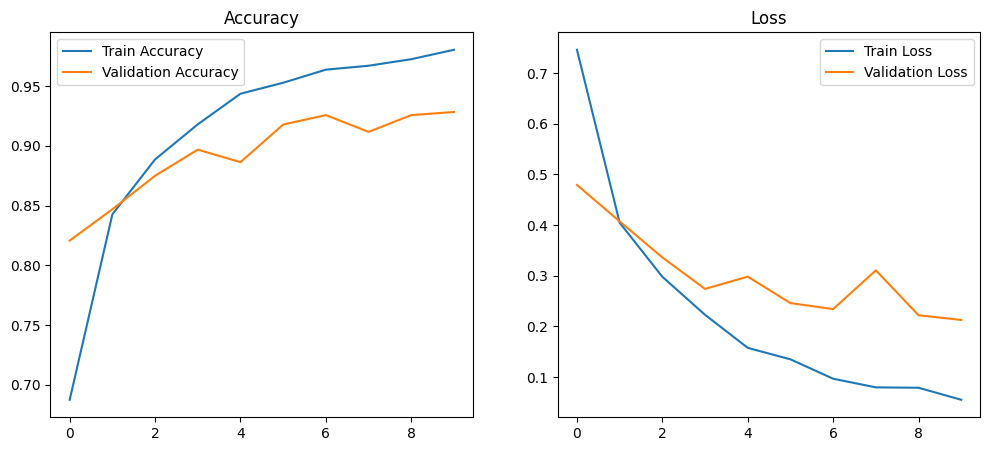

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# **Data Augmentation**

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# changing the posision of photos to increase accuracy
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(X_train)

# **Model 2: CNN with Augmentation**

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(X_val, y_val)
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 74s 497ms/step - accuracy: 0.5179 - loss: 1.0541 - val_accuracy: 0.7638 - val_loss: 0.7013
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 472ms/step - accuracy: 0.7340 - loss: 0.6748 - val_accuracy: 0.7393 - val_loss: 0.6248
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 472ms/step - accuracy: 0.7784 - loss: 0.5643 - val_accuracy: 0.7498 - val_loss: 0.6562
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 478ms/step - accuracy: 0.7841 - loss: 0.5252 - val_accuracy: 0.8206 - val_loss: 0.4847
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 82s 475ms/step - accuracy: 0.8183 - loss: 0.4759 - val_accuracy: 0.7769 - val_loss: 0.6009
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 465ms/step - accuracy: 0.8341 - loss: 0.4183 - val_accuracy: 0.8373 - val_loss: 0.4229
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 67s 466ms/step - accuracy: 0.8399 - loss: 0.4130 - val_accuracy: 0.8171 - val_loss: 0.4963
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 66s 460ms/step - accuracy: 0.8429 - loss: 0.4015 - val

# **Model 2: Accuracy and Loss Visualization**

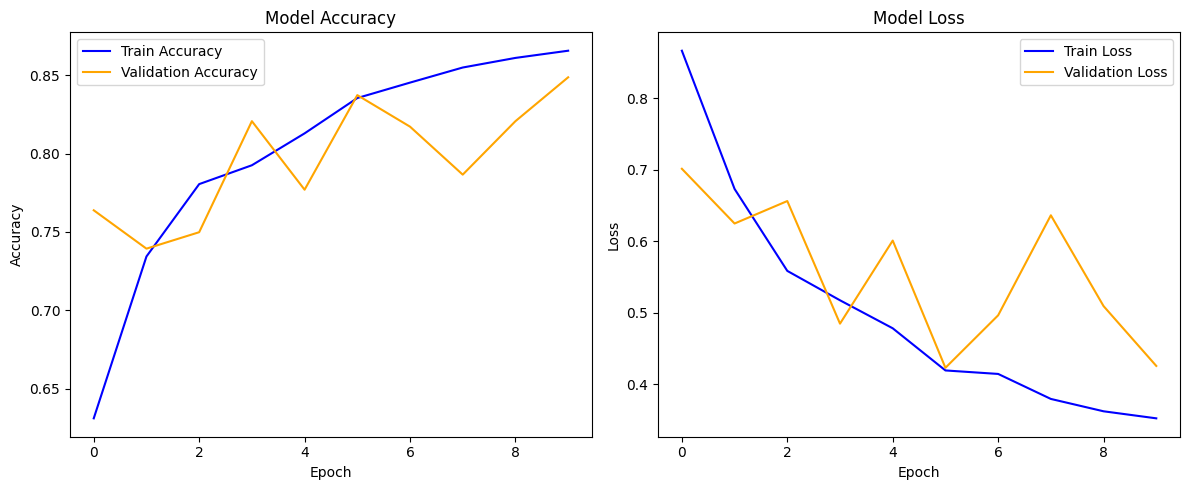

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Model 3: CNN with BatchNormalization & Dropout**

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Rebuilding the Model with Additional Improvements

model = Sequential()

# Conv Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Conv Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Conv Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dropout(0.5))  # Regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

# Train the model with augmented data
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=15,
    validation_data=(X_val, y_val)
)

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 120s 811ms/step - accuracy: 0.5318 - loss: 2.4355 - val_accuracy: 0.2511 - val_loss: 9.0039
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 116s 808ms/step - accuracy: 0.6608 - loss: 0.8203 - val_accuracy: 0.2826 - val_loss: 4.3814
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 115s 803ms/step - accuracy: 0.7097 - loss: 0.7128 - val_accuracy: 0.6667 - val_loss: 0.7685
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 115s 801ms/step - accuracy: 0.7242 - loss: 0.7097 - val_accuracy: 0.7839 - val_loss: 0.5909
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 115s 802ms/step - accuracy: 0.7511 - loss: 0.6493 - val_accuracy: 0.8075 - val_loss: 0.5035
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 142s 804ms/step - accuracy: 0.7630 - loss: 0.6023 - val_accuracy: 0.5302 - val_loss: 1.8091
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 115s 800ms/step - accuracy: 0.7672 - loss: 0.5974 - val_accuracy: 0.5223 - val_loss: 2.7176
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 116s 809ms/step - accuracy: 0.8143 -

# **Accuracy and Loss Visualization**

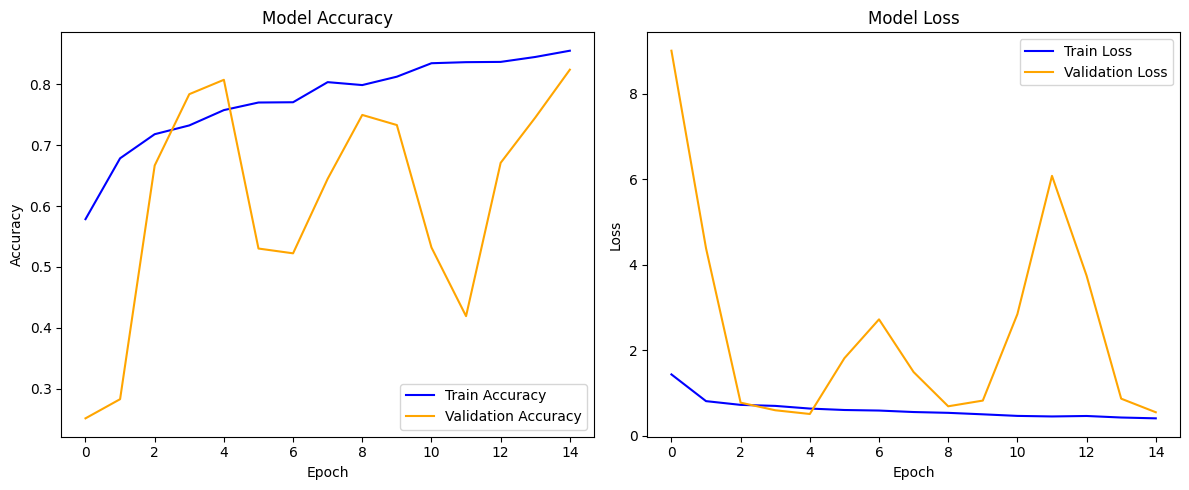

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# **Model Evaluation: Predictions and Metrics**

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# get the predictation
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step


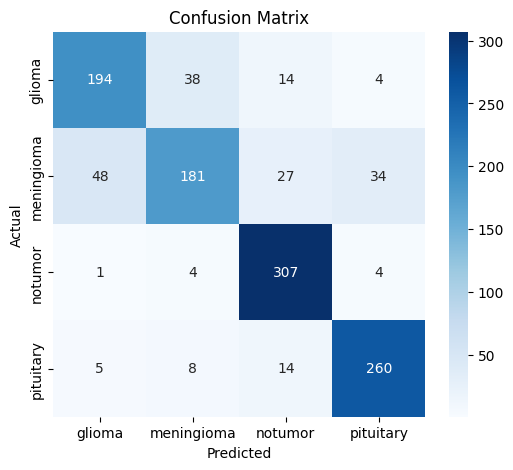

In [30]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories,
            yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=categories))

Classification Report:

              precision    recall  f1-score   support

      glioma       0.78      0.78      0.78       250
  meningioma       0.78      0.62      0.69       290
     notumor       0.85      0.97      0.91       316
   pituitary       0.86      0.91      0.88       287

    accuracy                           0.82      1143
   macro avg       0.82      0.82      0.82      1143
weighted avg       0.82      0.82      0.82      1143

